### Fruit Image Segmentation using K-Means Clustering

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import os

In [2]:
def ensure_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

In [3]:
def load_image(path):
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    if img is None:
        raise FileNotFoundError(f"Cannot load image from: {path}")
    return img

In [4]:
def convert_bgr_to_lab(img_bgr):
    return cv2.cvtColor(img_bgr, cv2.COLOR_BGR2LAB)

In [5]:
def convert_lab_to_bgr(img_lab):
    return cv2.cvtColor(img_lab, cv2.COLOR_LAB2BGR)

In [6]:
def kmeans_segment_lab(img_bgr, K=3, attempts=10, criteria_max_iter=100, criteria_eps=1.0):
    img_lab = convert_bgr_to_lab(img_bgr)
    h, w = img_lab.shape[:2]
    Z = img_lab.reshape((-1,3)).astype(np.float32)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, criteria_max_iter, criteria_eps)
    ret, labels, centers = cv2.kmeans(Z, K, None, criteria, attempts, cv2.KMEANS_RANDOM_CENTERS)
    centers = np.uint8(centers)
    segmented_flat = centers[labels.flatten()]
    segmented_lab = segmented_flat.reshape((h,w,3))
    segmented_bgr = convert_lab_to_bgr(segmented_lab)
    label_map = labels.reshape((h,w))
    return segmented_bgr, label_map, centers

In [7]:
def show_images(orig_bgr, seg_bgr, K):
    orig_rgb = cv2.cvtColor(orig_bgr, cv2.COLOR_BGR2RGB)
    seg_rgb = cv2.cvtColor(seg_bgr, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.imshow(orig_rgb)
    plt.title("Original")
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.imshow(seg_rgb)
    plt.title(f"Segmented (K={K})")
    plt.axis('off')
    plt.show()

In [8]:
IMAGE_PATH = "images/strawberry1.jpg"
OUT_DIR = "notebook_outputs"
K = 3
ensure_dir(OUT_DIR)

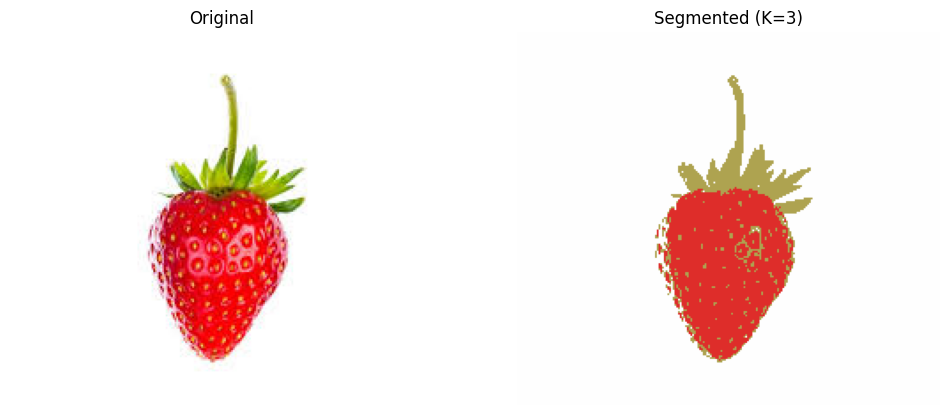

In [9]:
img = load_image(IMAGE_PATH)
segmented, labels, centers = kmeans_segment_lab(img, K=K)
show_images(img, segmented, K)

In [10]:
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
base = os.path.splitext(os.path.basename(IMAGE_PATH))[0]
out_folder = os.path.join(OUT_DIR, f"{base}_{timestamp}")
ensure_dir(out_folder)
cv2.imwrite(os.path.join(out_folder, f"{base}_segmented_K{K}.png"), segmented)
# save masks
for k in range(centers.shape[0]):
    mask = (labels == k).astype('uint8') * 255
    cv2.imwrite(os.path.join(out_folder, f"{base}_mask_{k}.png"), mask)

print("Saved outputs to:", out_folder)

Saved outputs to: notebook_outputs\strawberry1_20251123_152359
